In [2]:
import CairoMakie as Mke

In [3]:
using GeoStats

In [4]:
img = georef((A=rand(10,10), B=rand(10,10)))

A,B,geometry
Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],🖈 Cartesian{NoDatum}
0.951999,0.357346,"Quadrangle((x: 0.0 m, y: 0.0 m), ..., (x: 0.0 m, y: 1.0 m))"
0.613707,0.463946,"Quadrangle((x: 1.0 m, y: 0.0 m), ..., (x: 1.0 m, y: 1.0 m))"
0.968978,0.193068,"Quadrangle((x: 2.0 m, y: 0.0 m), ..., (x: 2.0 m, y: 1.0 m))"
0.359228,0.86193,"Quadrangle((x: 3.0 m, y: 0.0 m), ..., (x: 3.0 m, y: 1.0 m))"
0.196944,0.641571,"Quadrangle((x: 4.0 m, y: 0.0 m), ..., (x: 4.0 m, y: 1.0 m))"
0.272282,0.178189,"Quadrangle((x: 5.0 m, y: 0.0 m), ..., (x: 5.0 m, y: 1.0 m))"
0.629615,0.281848,"Quadrangle((x: 6.0 m, y: 0.0 m), ..., (x: 6.0 m, y: 1.0 m))"
0.553742,0.223608,"Quadrangle((x: 7.0 m, y: 0.0 m), ..., (x: 7.0 m, y: 1.0 m))"


In [5]:
img.geometry

10×10 CartesianGrid
├─ minimum: Point(x: 0.0 m, y: 0.0 m)
├─ maximum: Point(x: 10.0 m, y: 10.0 m)
└─ spacing: (1.0 m, 1.0 m)

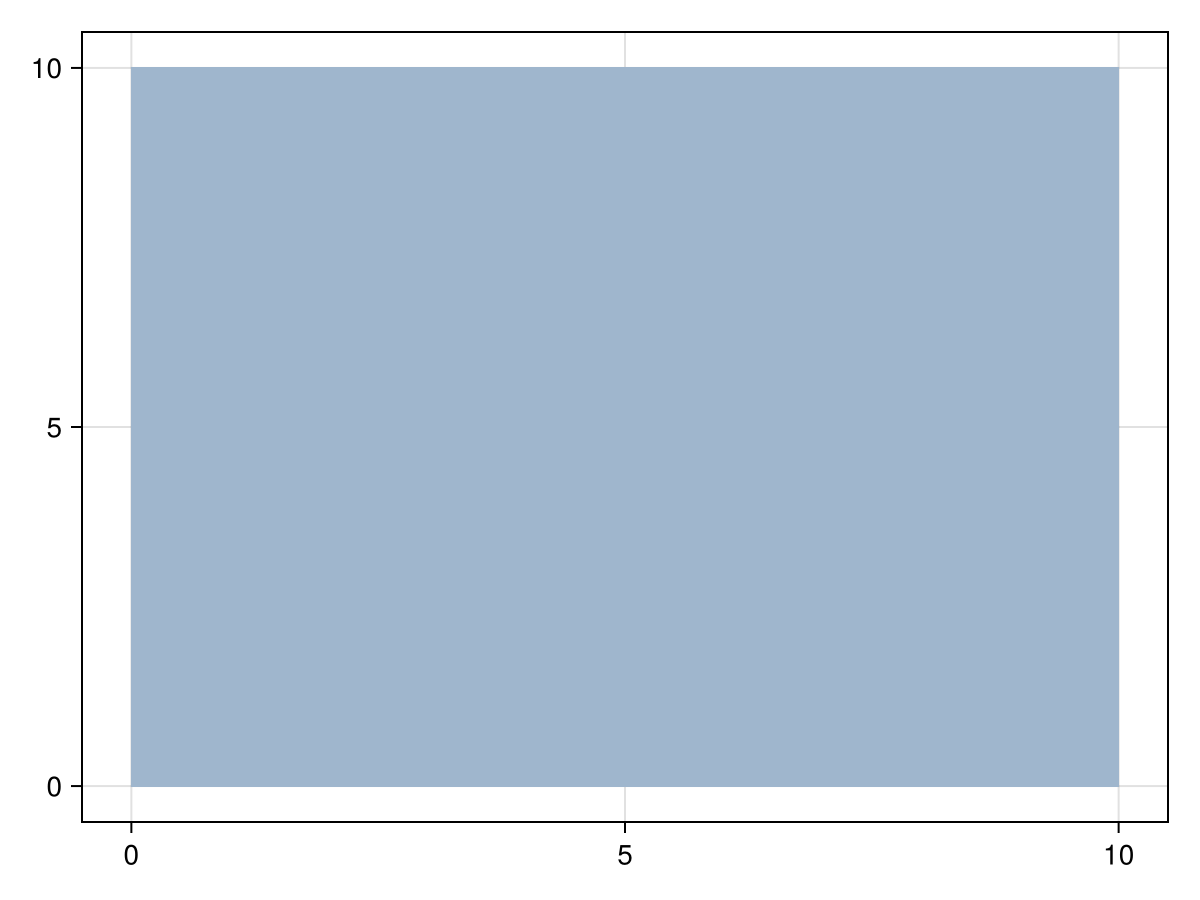

In [6]:
viz(img.geometry)

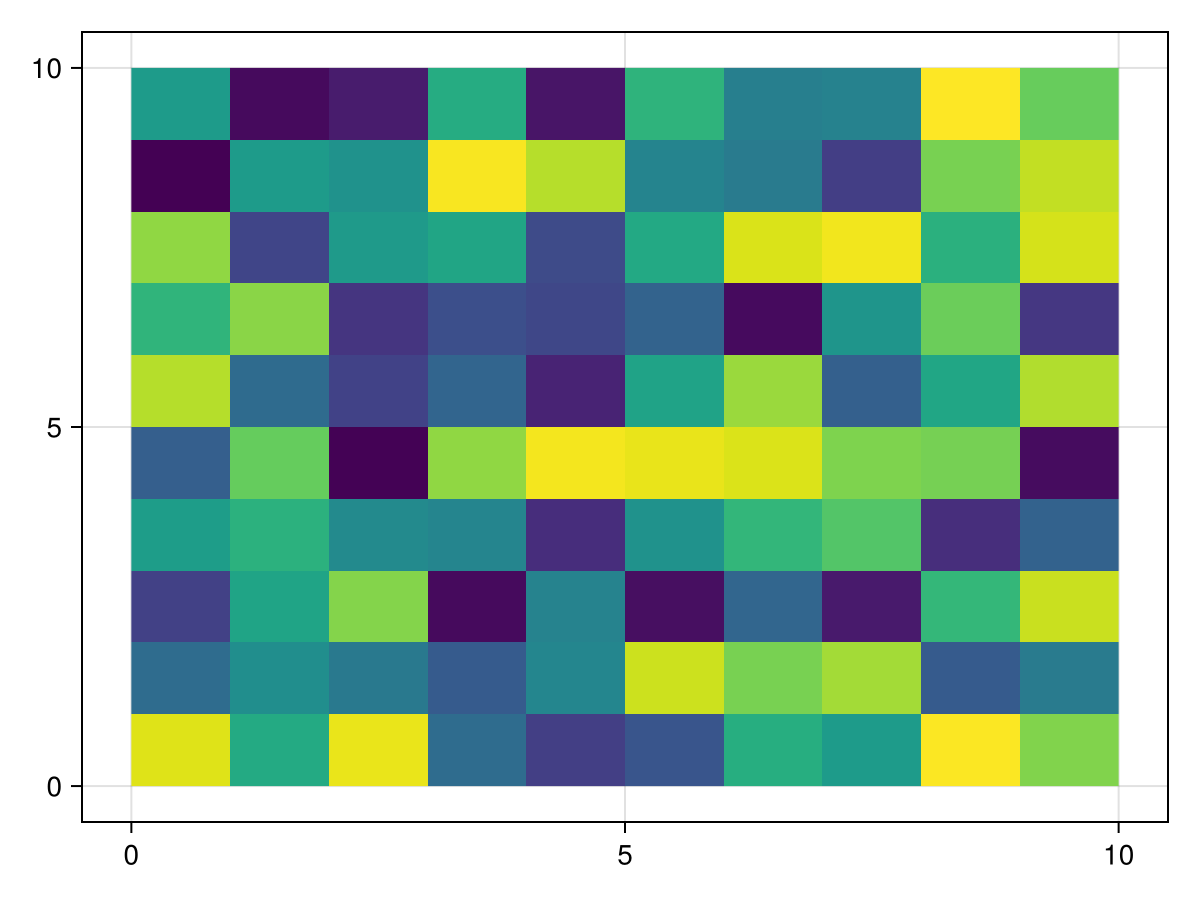

In [8]:
viz(img.geometry, color =img.A)

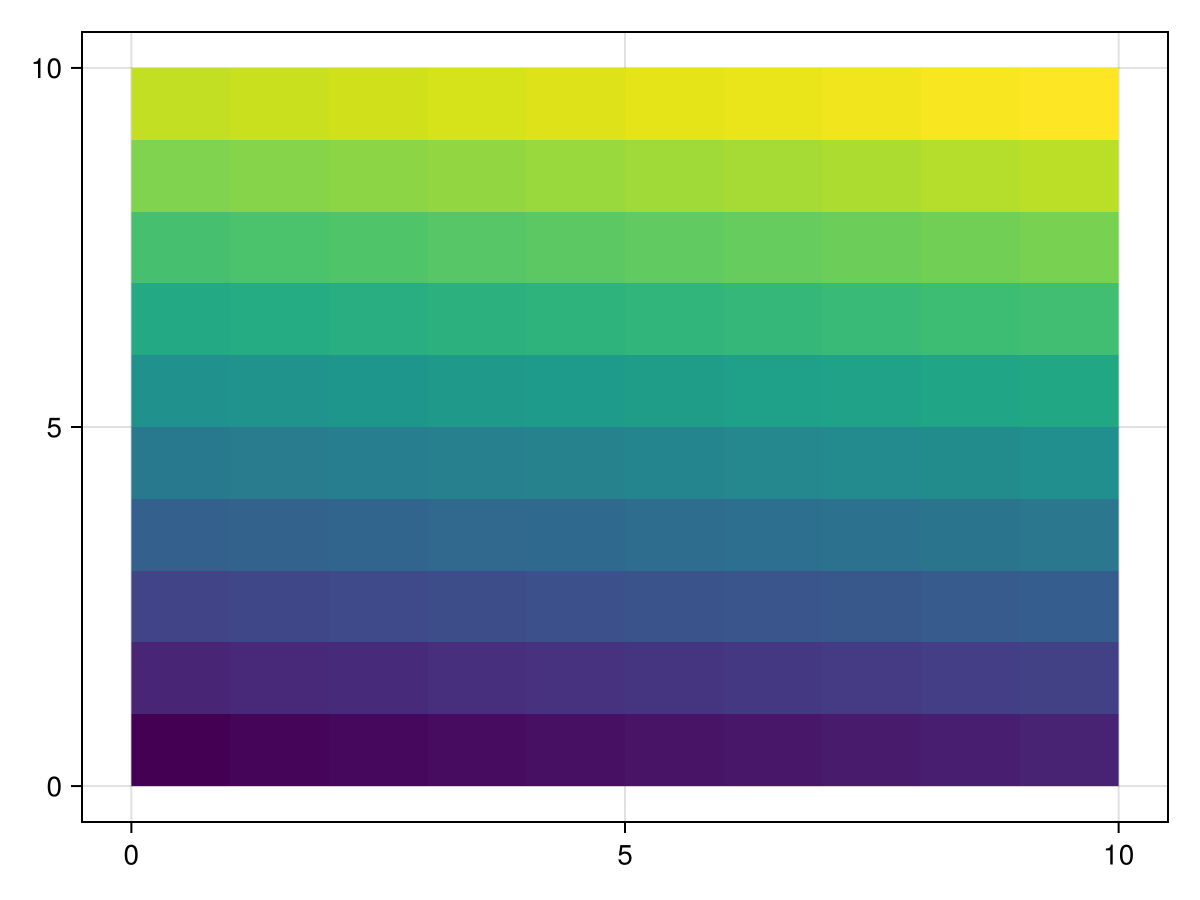

In [9]:
viz(img.geometry, color = 1:length(img.A))

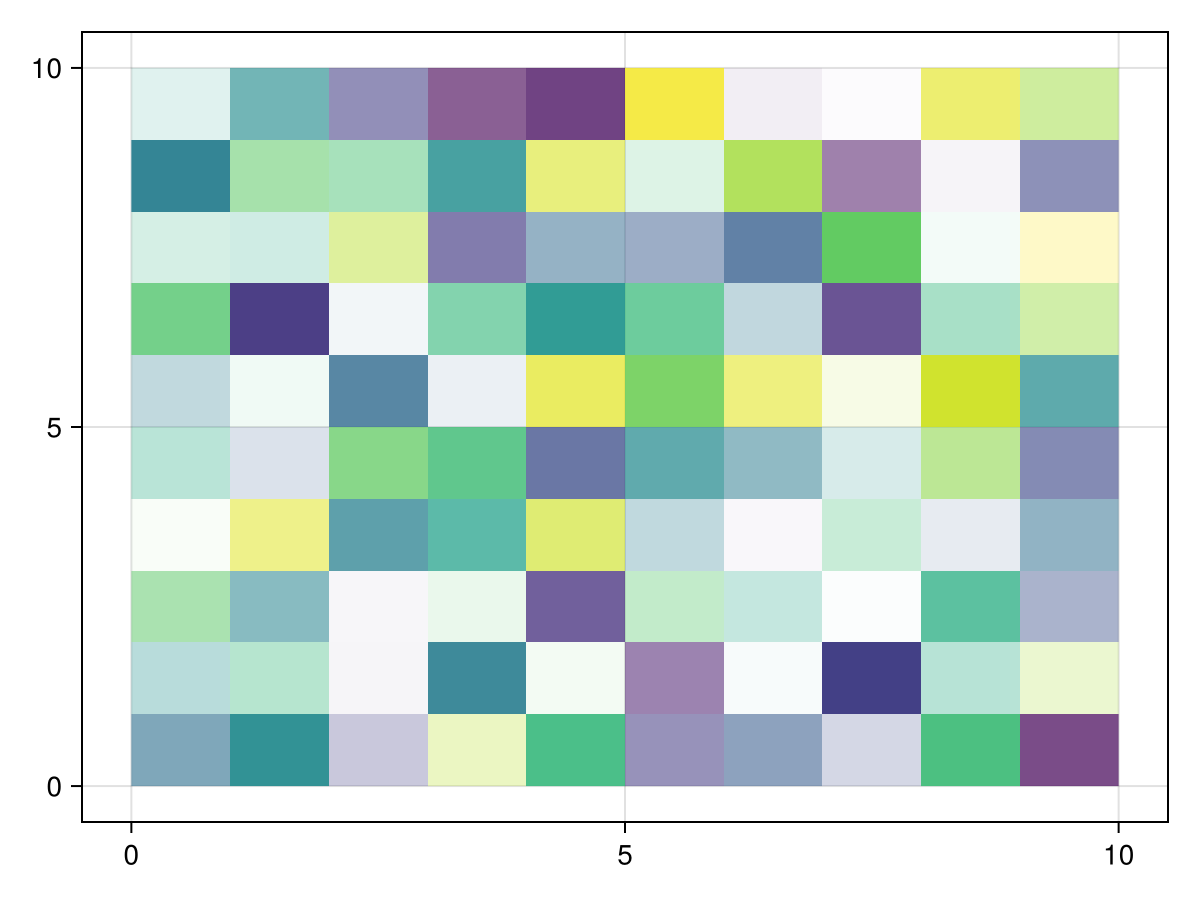

In [10]:
viz(img.geometry, color=img.B, alpha=rand(length(img.B)))

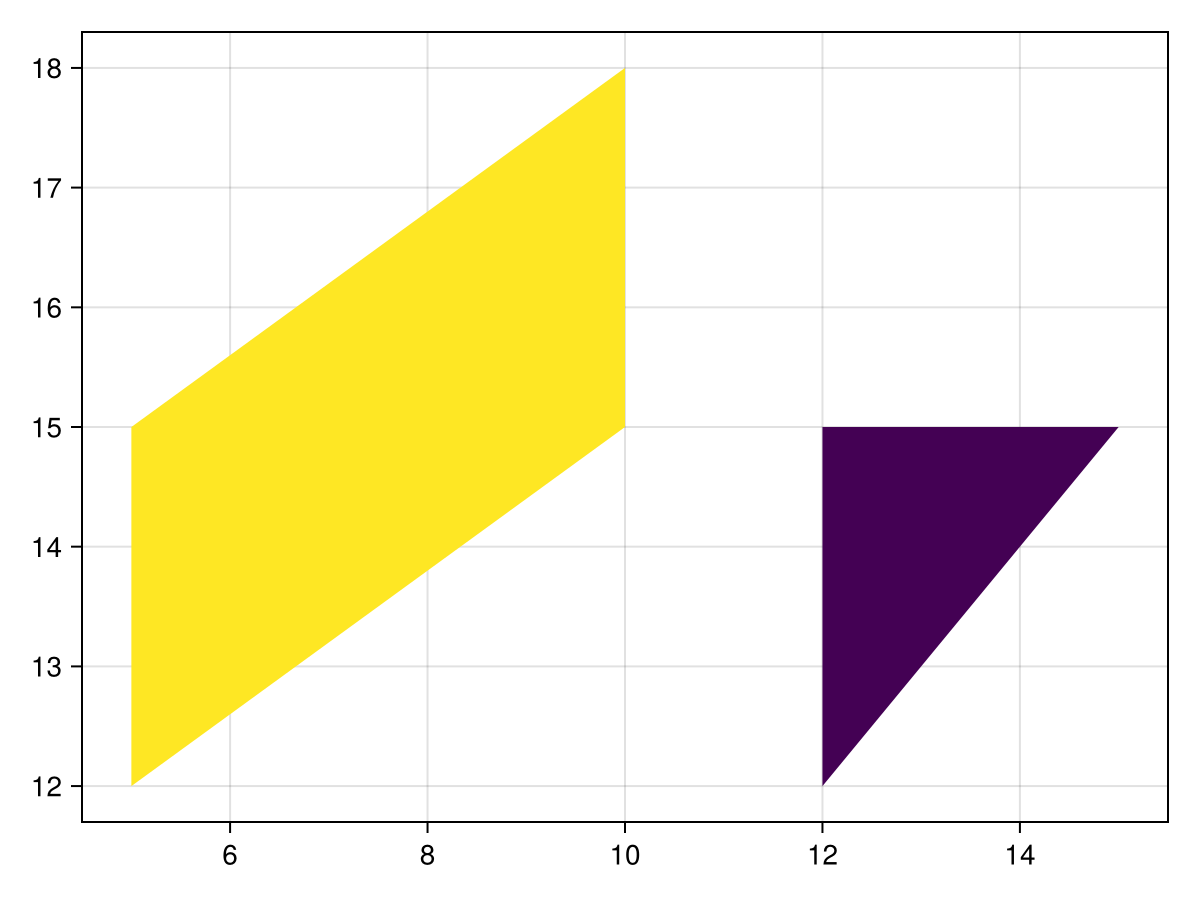

In [12]:
gset = GeometrySet([
    Triangle((12, 12), (15, 15), (12, 15)), 
    Quadrangle((5, 12), (10, 15), (10, 18), (5, 15))
])

gis = georef((A=[0.1, 0.2], B=[0.3, 0.4]), gset)

viz(gis.geometry, color=gis.A)

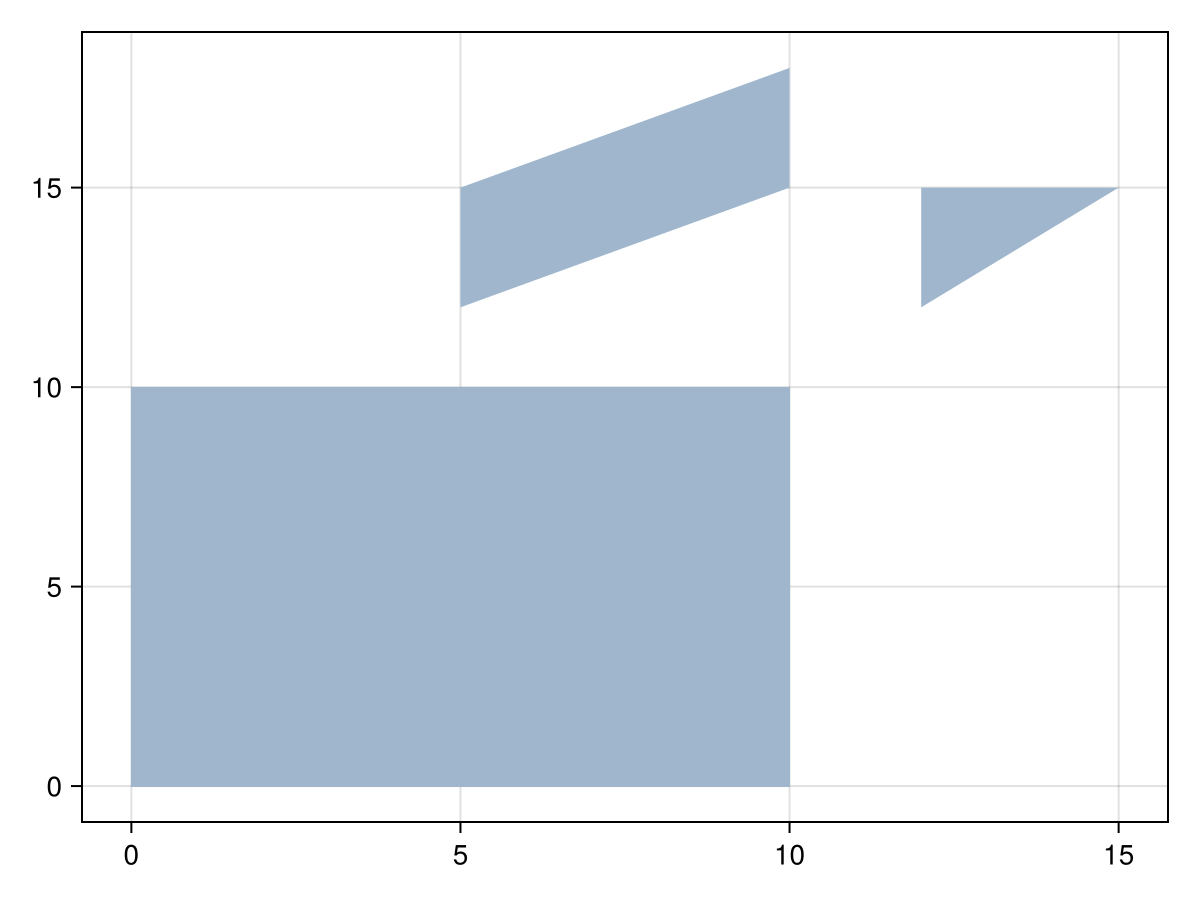

In [13]:
viz(img.geometry)
viz!(gis.geometry)

# display current figure
Mke.current_figure()

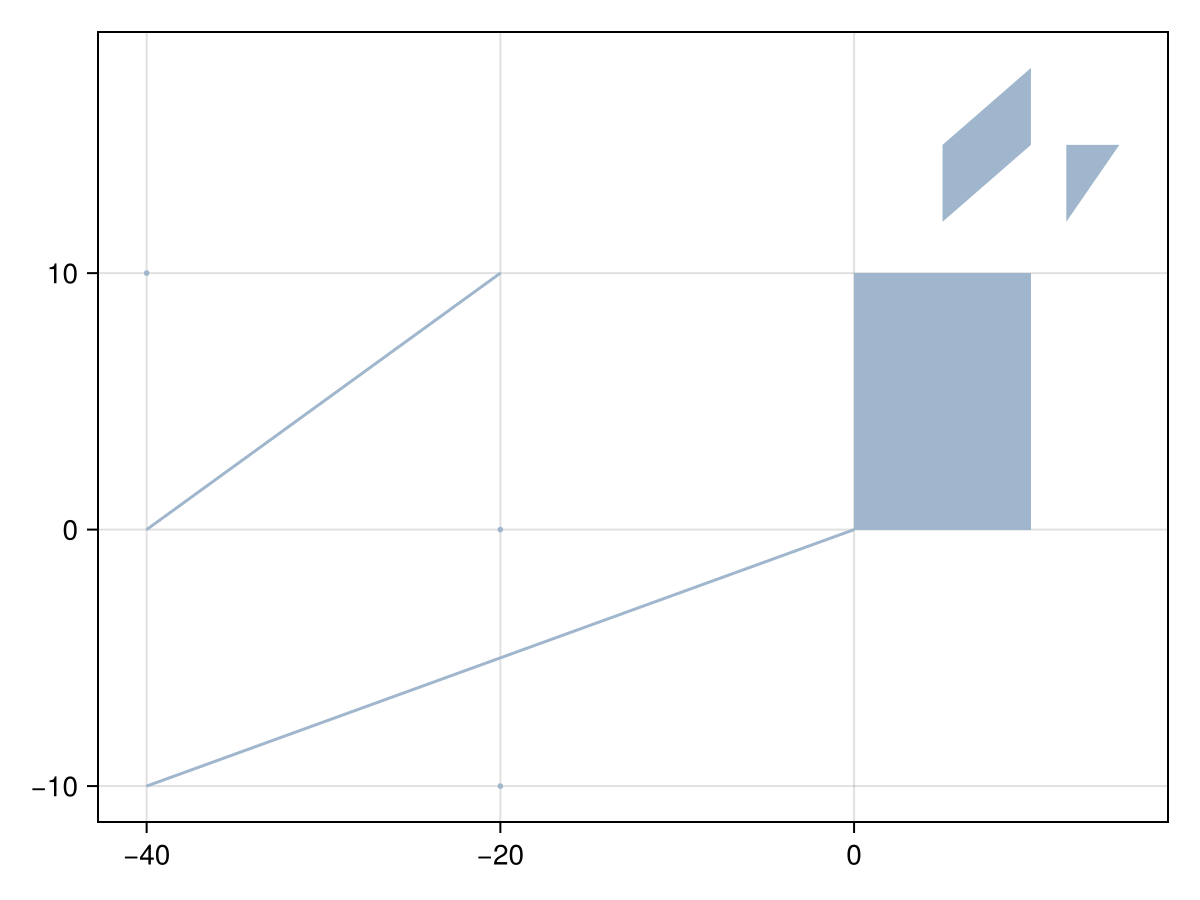

In [14]:
viz!([Point(-20, -10), Point(-20, 0), Point(-40, 10)])
viz!([Segment((-40, -10), (0, 0)), Segment((-40, 0), (-20, 10))])

Mke.current_figure()

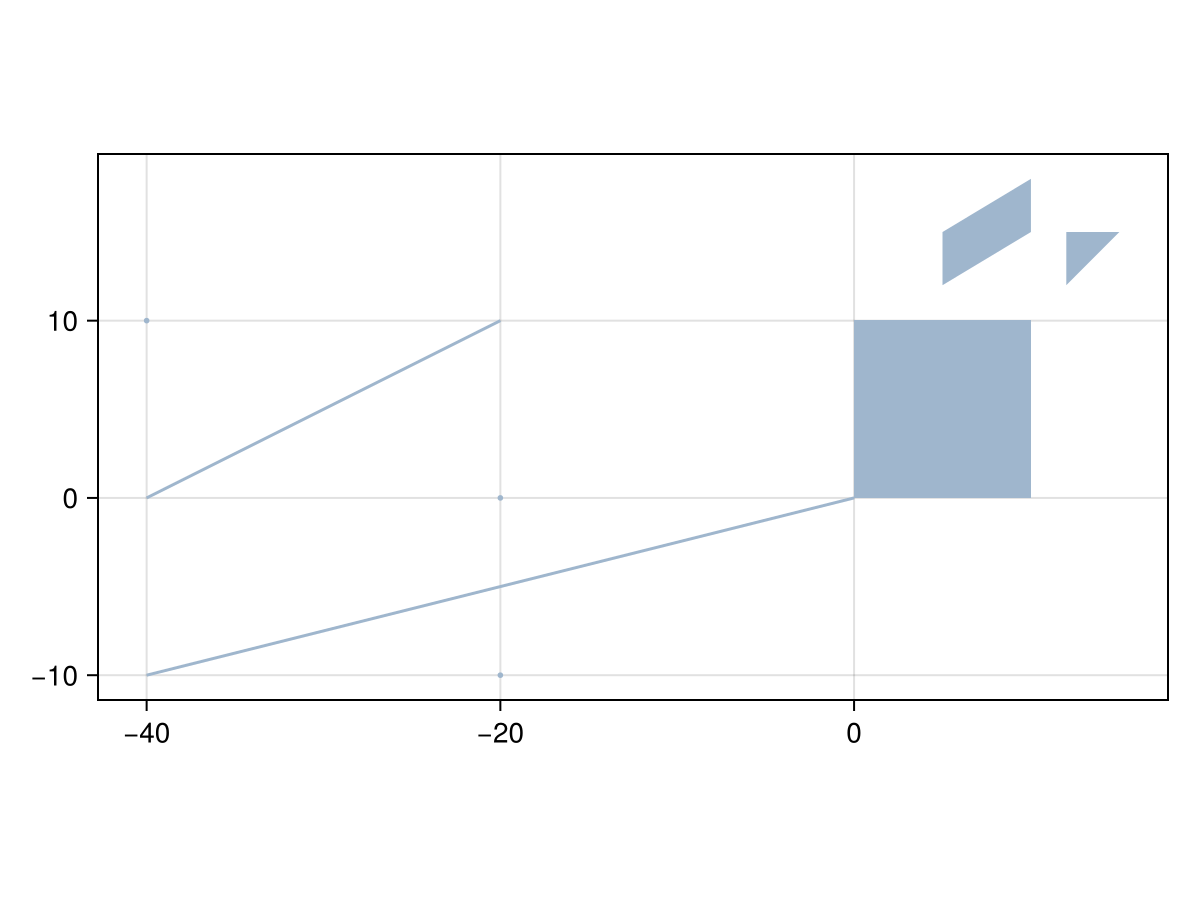

In [15]:
ax = Mke.current_axis()
ax.aspect = Mke.DataAspect()
Mke.current_figure()

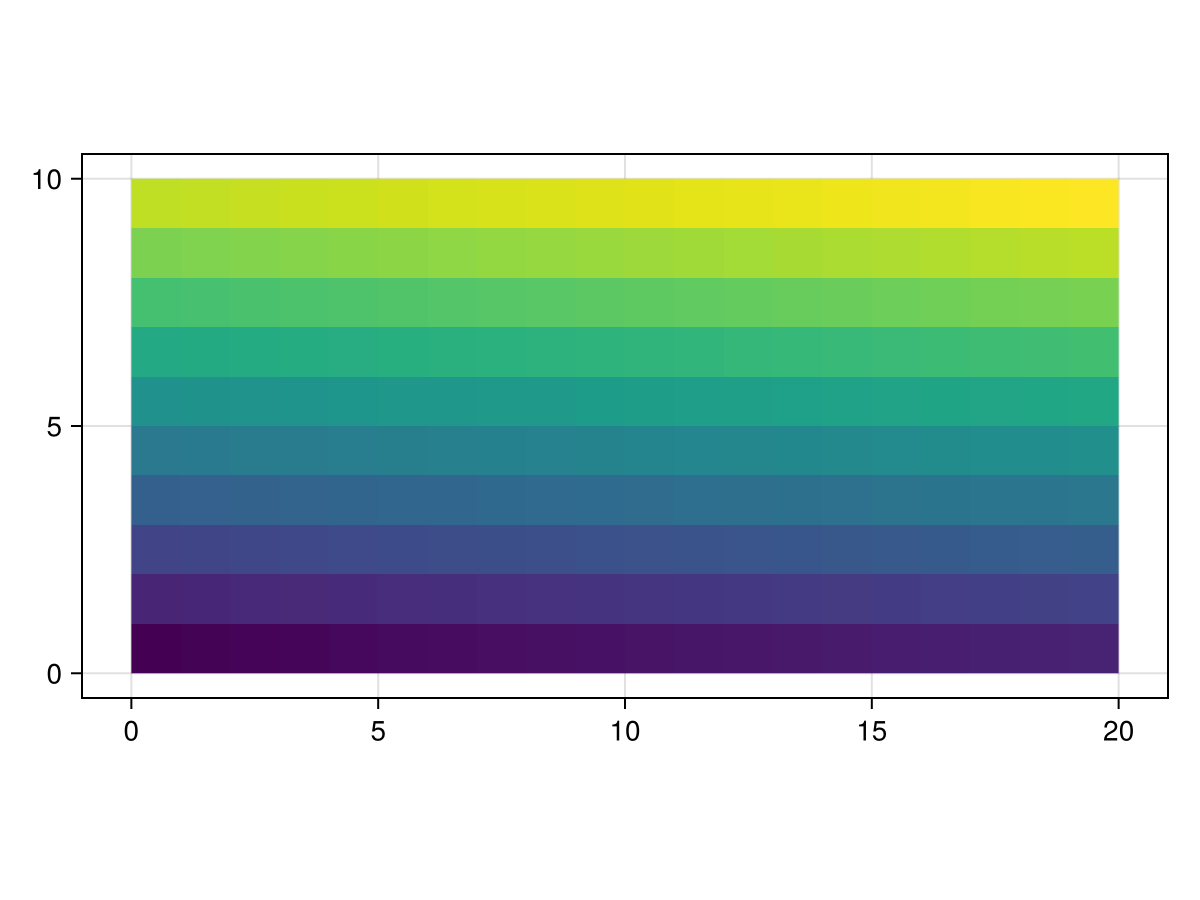

In [16]:
viz(CartesianGrid(20, 10), color=1:200, axis=(; aspect=Mke.DataAspect()))

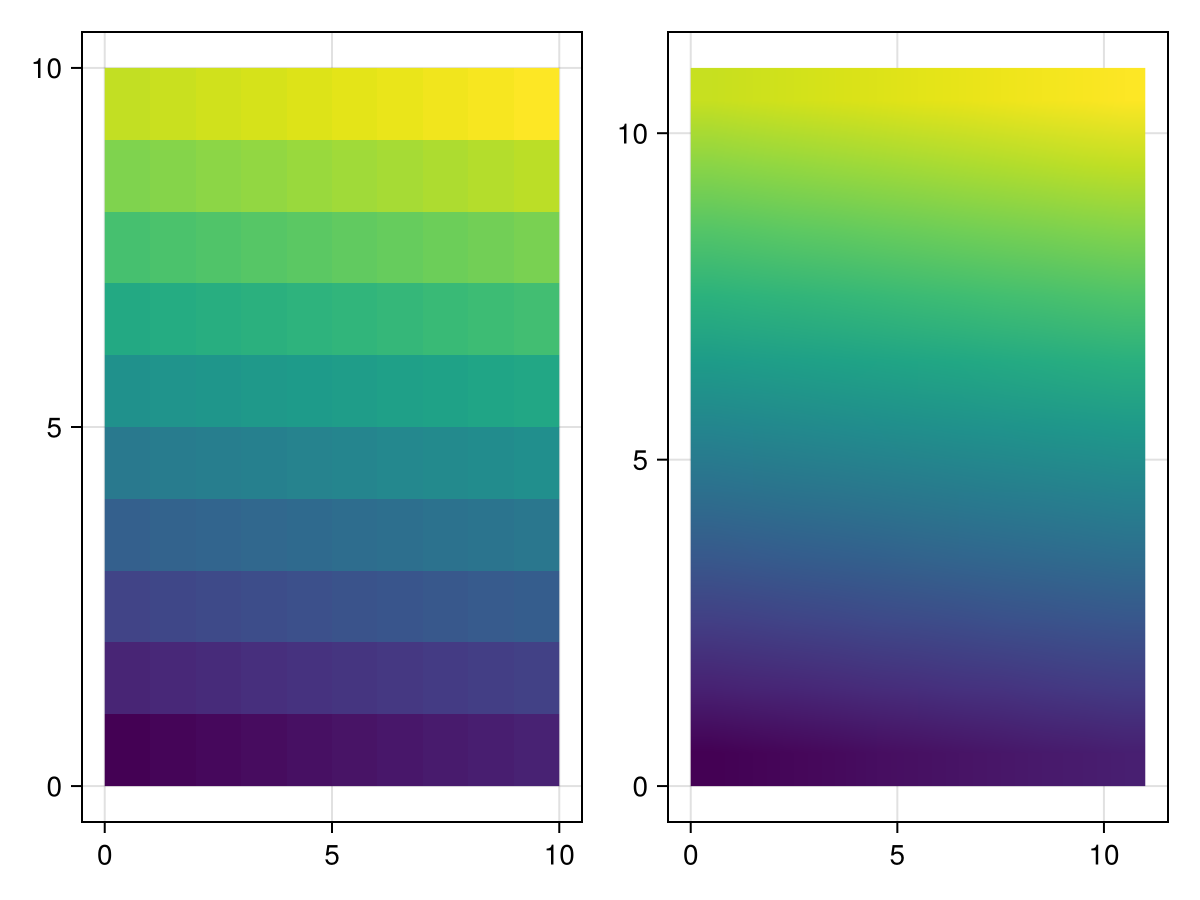

In [17]:
grid = CartesianGrid(10, 10)

fig = Mke.Figure()
viz(fig[1,1], grid, color=1:nelements(grid))
viz(fig[1,2], grid, color=1:nvertices(grid))
fig

In [18]:
using GeoIO

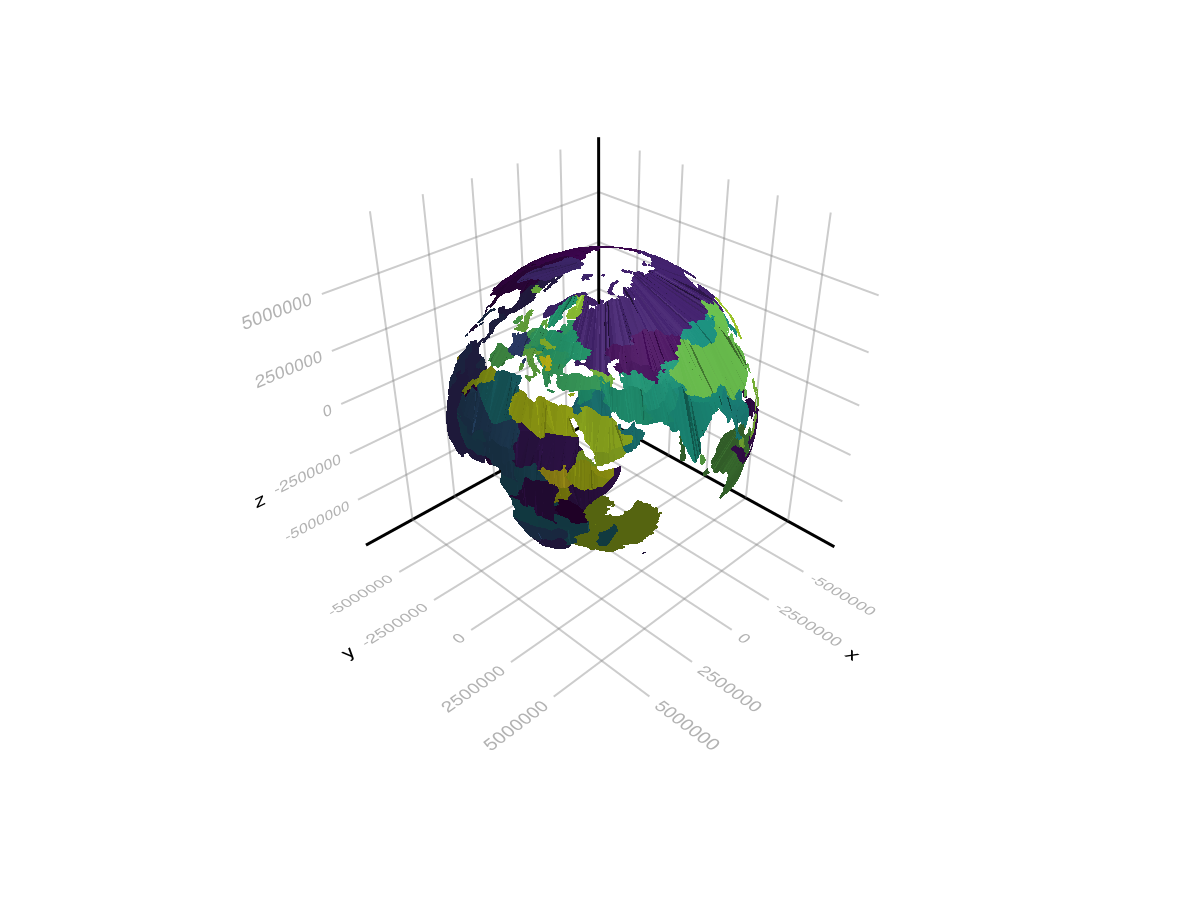

In [19]:
world = GeoIO.load("data/countries.geojson")
viz(world.geometry, color=1:nrow(world))

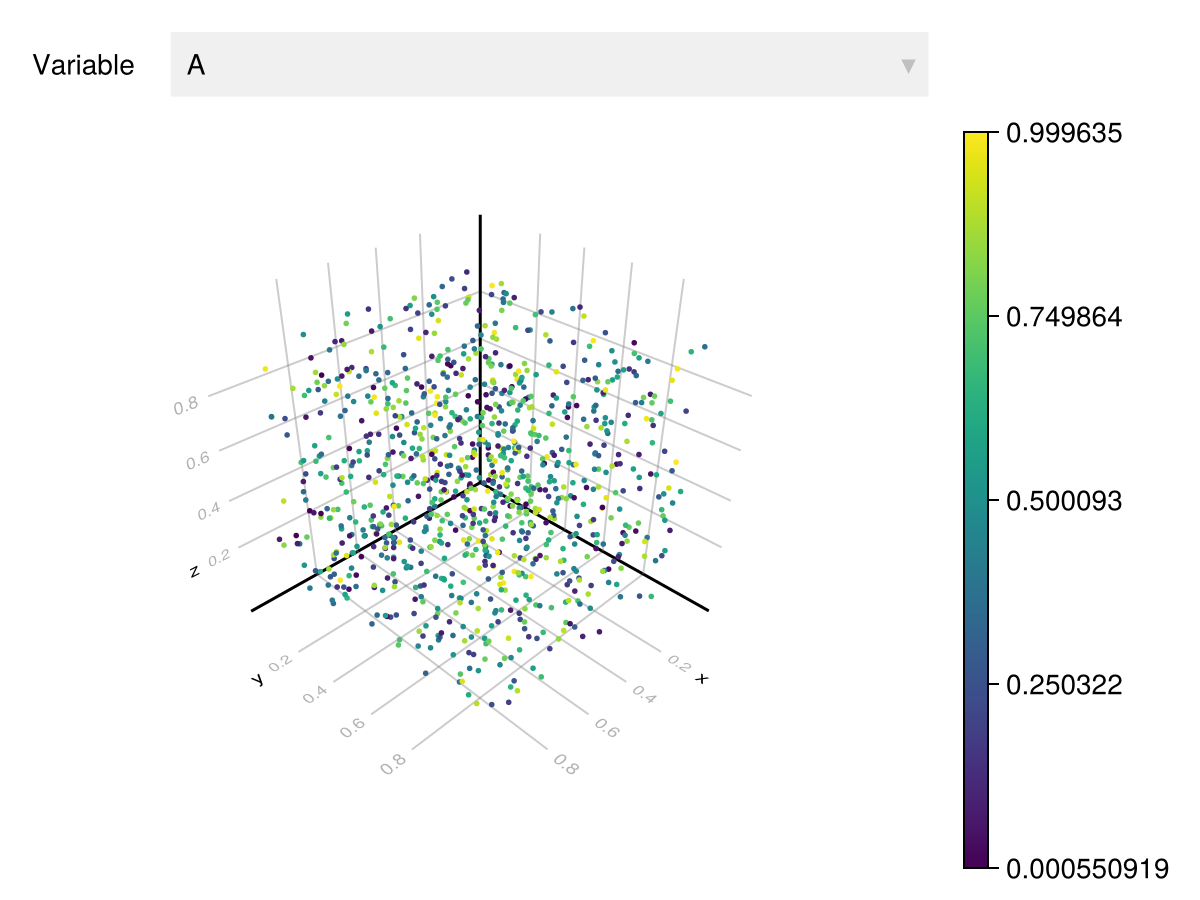

In [21]:
geotable = georef((A=rand(1000), B=rand(1000)), rand(Point, 1000))

viewer(geotable)

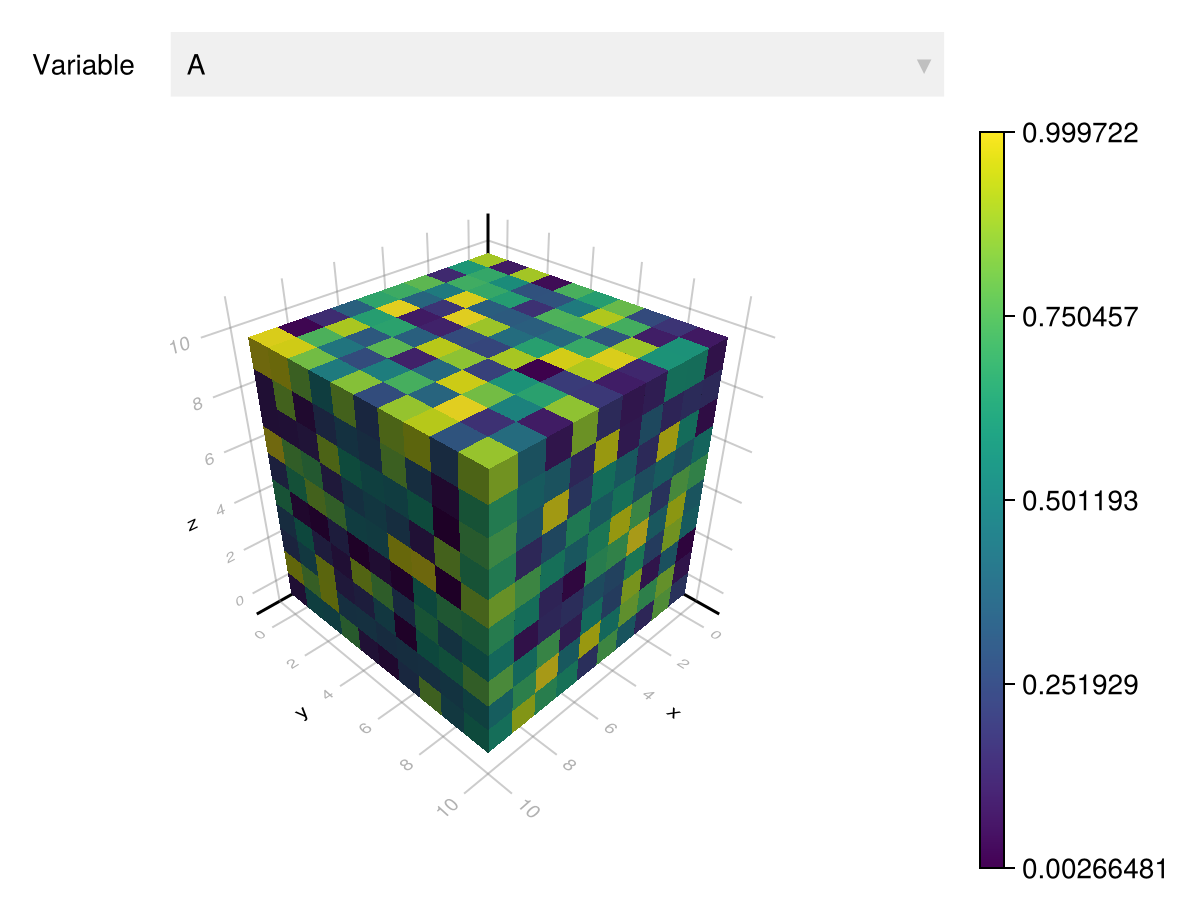

In [22]:
geotable = georef((A=rand(1000), B=rand(1000)), CartesianGrid(10,10,10))

geotable |> viewer

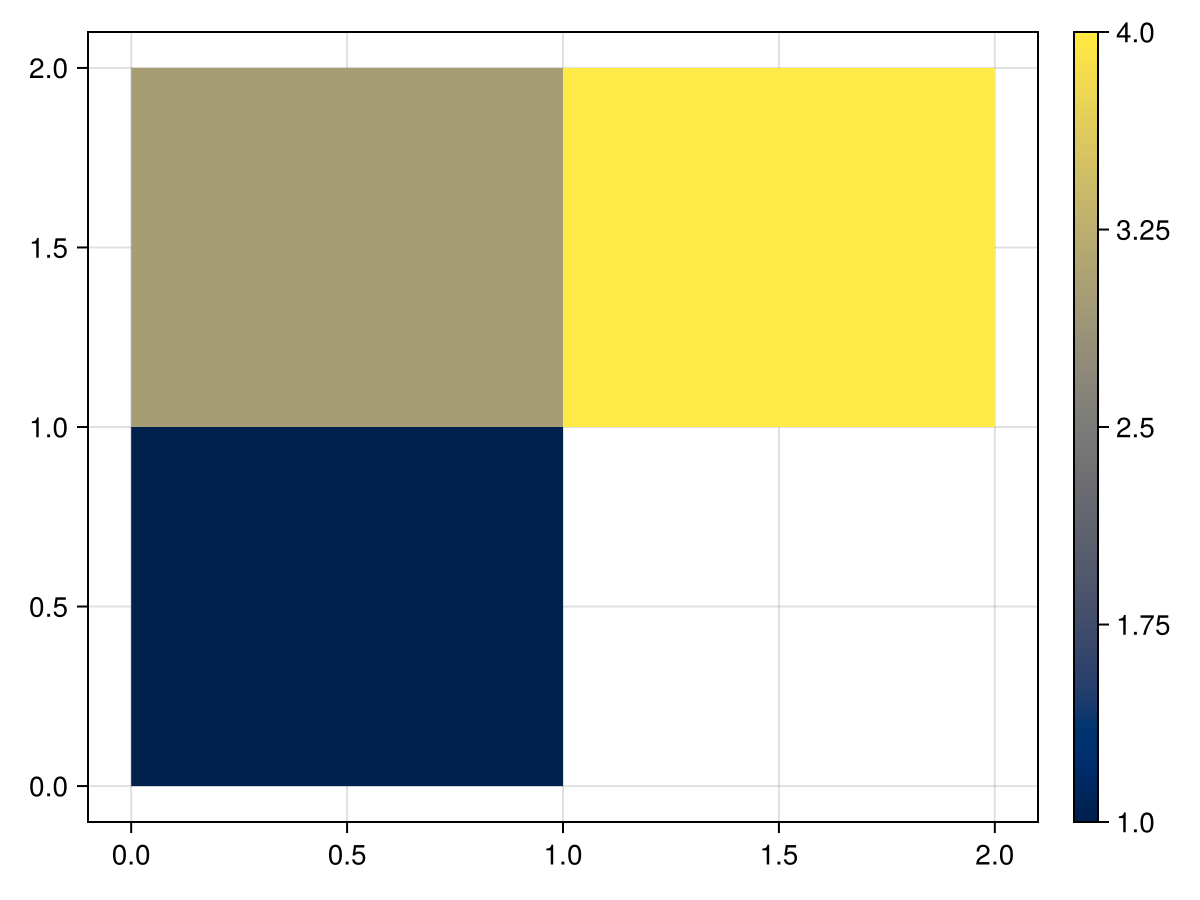

In [23]:
grid = CartesianGrid(2,2)
vals = [1, missing, 3, 4]
cmap = "cividis"

fig = Mke.Figure()
viz(fig[1,1], grid, color=vals, colormap=cmap)
cbar(fig[1,2], vals, colormap=cmap)
fig